## **<u> EDA (Exploratory Data Analysis)**</u>

### Aim : To explore data for finding cause of road damage and effects of different condition on it.

**Libraries :**
- Pandas

- Numpy

- Matplotlib

- Seaborn

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

In [81]:
df=pd.read_csv('Data/ESC 12 Pavement Dataset.csv')
df

,Segment ID,PCI,Road Type,AADT,Asphalt Type,Last Maintenance,Average Rainfall,Rutting,IRI,Needs Maintenance
0,SID 155440,70.00,Secondary,4634,Concrete,2022,42.07,15.11,0.68,0
1,SID 244365,37.87,Tertiary,3474,Asphalt,2017,79.60,19.67,0.99,1
2,SID 137867,88.32,Tertiary,1734,Concrete,2019,62.69,14.73,0.50,0
3,SID 540519,52.30,Tertiary,3119,Asphalt,2008,79.32,17.01,1.04,1
4,SID 745776,49.10,Tertiary,3505,Asphalt,2019,71.81,21.08,1.18,1
...,...,...,...,...,...,...,...,...,...,...
1049995,SID 766608,60.37,Tertiary,2048,Concrete,2018,62.95,11.60,0.52,0
1049996,SID 594559,89.70,Secondary,3792,Concrete,2019,54.06,13.06,0.58,0
1049997,SID 345069,75.59,Secondary,33876,Concrete,2019,54.52,16.78,0.53,0
1049998,SID 472153,89.31,Tertiary,259,Asphalt,2025,63.54,16.07,0.70,0


**Information About Dataset**

- Column : All the Columns present in dataset

- Non-Null Count : Count of Non Null Values

- Dtype : Datatype of values inside the Columns

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Segment ID         1050000 non-null  object 
 1   PCI                1050000 non-null  float64
 2   Road Type          1050000 non-null  object 
 3   AADT               1050000 non-null  int64  
 4   Asphalt Type       1050000 non-null  object 
 5   Last Maintenance   1050000 non-null  int64  
 6   Average Rainfall   1050000 non-null  float64
 7   Rutting            1050000 non-null  float64
 8   IRI                1050000 non-null  float64
 9   Needs Maintenance  1050000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 80.1+ MB


**Short Summary of Data**

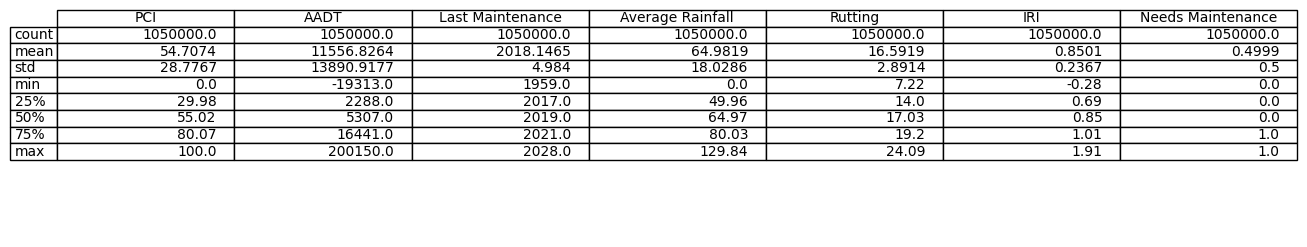

In [83]:
plt.figure(figsize=(16,1))
plt.table(round(df.describe(),4),loc='top')
plt.axis('off')
plt.show()

**Checking For Duplicated Data**

In [84]:
df.duplicated().sum()

0

### **Feature Engineering**

Creating new columns(features) for better analysis.

In [85]:
df.loc[df['PCI']<10,'PCI level']='failed'
df.loc[df['PCI']>=10,'PCI level']='very poor'
df.loc[df['PCI']>24,'PCI level']='poor'
df.loc[df['PCI']>39,'PCI level']='fair'
df.loc[df['PCI']>54,'PCI level']='good'
df.loc[df['PCI']>=69,'PCI level']='very good'
df.loc[df['PCI']>=84,'PCI level']='excellent'

In [86]:
df.loc[df['Average Rainfall']<=40,'AR level']='low'
df.loc[df['Average Rainfall']>=40,'AR level']='medium'
df.loc[df['Average Rainfall']>=81,'AR level']='high'

In [87]:
df.loc[df['Rutting']<=5,'Rutting level']='good'
df.loc[df['Rutting']>=5,'Rutting level']='mid'
df.loc[df['Rutting']>=10,'Rutting level']='severe'
df.loc[df['Rutting']>20,'Rutting level']='very severe'

In [88]:
df.loc[df['AADT']<=1000,'AADT level']='very low'
df.loc[df['AADT']>=1001,'AADT level']='low'
df.loc[df['AADT']>=5001,'AADT level']='medium'
df.loc[df['AADT']>10000,'AADT level']='high'
df.loc[df['AADT']>25000,'AADT level']='very high'
df.loc[df['AADT']>50000,'AADT level']='extremely high'

In [89]:
df.loc[df['IRI']<1.6,'IRI level']='very good'
df.loc[df['IRI']>=1.6,'IRI level']='good'
df.loc[df['IRI']>=2.6,'IRI level']='Fair'
df.loc[df['IRI']>3.5,'IRI level']='poor'
df.loc[df['IRI']>4.5,'IRI level']='very poor'

In [90]:
df.loc[df['Last Maintenance']<2021, 'Maintenance prevention']='Preventive Maintenance'
df.loc[df['Last Maintenance']>=2021, 'Maintenance prevention']='Routine Maintenance'

**Removing Outliers**

Removing data which does not make sense to make sure data is free from outliers(noice).

In [91]:
df=df[df["IRI"]>=0.0]

In [92]:
df=df[df["AADT"]>=0.0]

In [93]:
df=df[df["Last Maintenance"]<=2024]

In [94]:
df

,Segment ID,PCI,Road Type,AADT,Asphalt Type,Last Maintenance,Average Rainfall,Rutting,IRI,Needs Maintenance,PCI level,AR level,Rutting level,AADT level,IRI level,Maintenance prevention
0,SID 155440,70.00,Secondary,4634,Concrete,2022,42.07,15.11,0.68,0,very good,medium,severe,low,very good,Routine Maintenance
1,SID 244365,37.87,Tertiary,3474,Asphalt,2017,79.60,19.67,0.99,1,poor,medium,severe,low,very good,Preventive Maintenance
2,SID 137867,88.32,Tertiary,1734,Concrete,2019,62.69,14.73,0.50,0,excellent,medium,severe,low,very good,Preventive Maintenance
3,SID 540519,52.30,Tertiary,3119,Asphalt,2008,79.32,17.01,1.04,1,fair,medium,severe,low,very good,Preventive Maintenance
4,SID 745776,49.10,Tertiary,3505,Asphalt,2019,71.81,21.08,1.18,1,fair,medium,very severe,low,very good,Preventive Maintenance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049994,SID 980091,49.66,Secondary,567,Concrete,2020,54.76,14.61,0.86,0,fair,medium,severe,very low,very good,Preventive Maintenance
1049995,SID 766608,60.37,Tertiary,2048,Concrete,2018,62.95,11.60,0.52,0,good,medium,severe,low,very good,Preventive Maintenance
1049996,SID 594559,89.70,Secondary,3792,Concrete,2019,54.06,13.06,0.58,0,excellent,medium,severe,low,very good,Preventive Maintenance
1049997,SID 345069,75.59,Secondary,33876,Concrete,2019,54.52,16.78,0.53,0,very good,medium,severe,very high,very good,Preventive Maintenance


**Cheking null Values**

In [95]:
df.isnull().sum()

Segment ID                0
PCI                       0
Road Type                 0
AADT                      0
Asphalt Type              0
Last Maintenance          0
Average Rainfall          0
Rutting                   0
IRI                       0
Needs Maintenance         0
PCI level                 0
AR level                  0
Rutting level             0
AADT level                0
IRI level                 0
Maintenance prevention    0
dtype: int64

**Box plot for Checking Distribution of Numerical Data after Removing Outliers.**

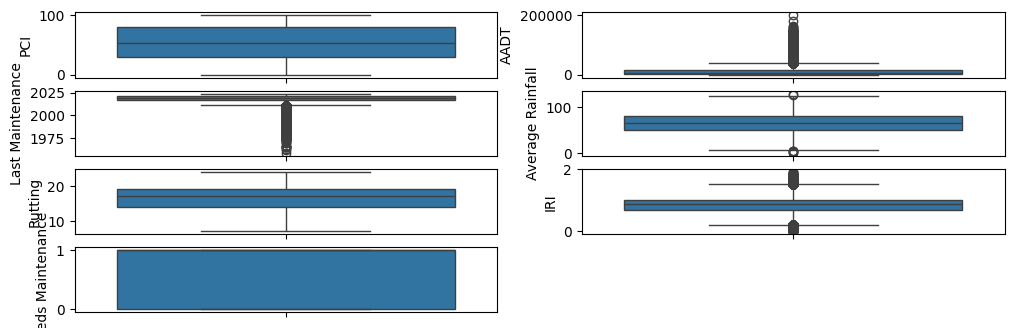

In [96]:
plt.figure(figsize=(12,10))
for i,val in enumerate(df.describe().columns):
    plt.subplot(10,2,i+1)
    sns.boxplot(df[val])
plt.show()

**Checking Duplicate**

In [97]:
df.duplicated().sum()

0

**Dataset summary after Removing Outliers(Noise).**

In [98]:
round(df.describe(),2)

,PCI,AADT,Last Maintenance,Average Rainfall,Rutting,IRI,Needs Maintenance
count,1016793.00,1016793.00,1016793.00,1016793.00,1016793.00,1016793.00,1016793.00
mean,54.05,11693.27,2017.99,65.38,16.67,0.85,0.51
std,28.77,13926.79,4.94,18.03,2.88,0.24,0.50
min,0.00,0.00,1959.00,0.00,7.22,-0.00,0.00
25%,29.45,2347.00,2017.00,50.30,14.06,0.69,0.00
50%,53.41,5438.00,2019.00,65.86,17.34,0.86,1.00
75%,79.51,16590.00,2021.00,80.35,19.23,1.02,1.00
max,100.00,200150.00,2024.00,129.84,24.09,1.91,1.00


**Cheking Proportion of Categorical Features**

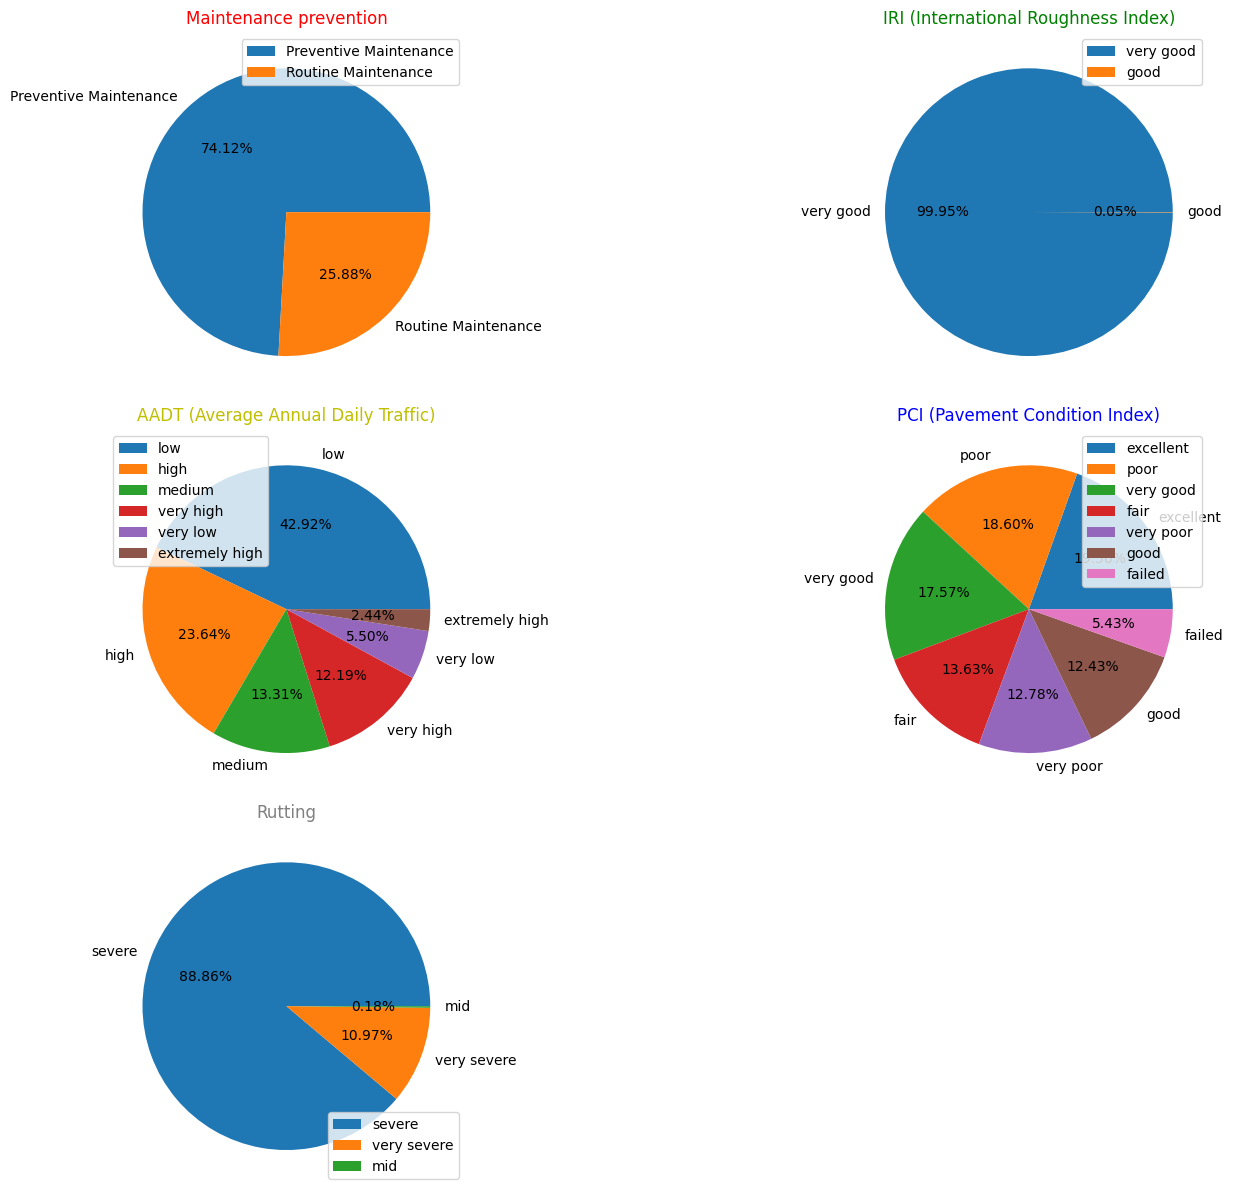

In [99]:
plt.figure(figsize=(15,20))
plt.subplot(5,2,1)
plt.pie(df['Maintenance prevention'].value_counts(),autopct='%1.2f%%',labels=df['Maintenance prevention'].value_counts().index)
plt.legend(df['Maintenance prevention'].value_counts().index)
plt.title('Maintenance prevention',color='r')
plt.subplot(5,2,2)
plt.pie(df['IRI level'].value_counts(),autopct='%1.2f%%',labels=df['IRI level'].value_counts().index)
plt.legend(df['IRI level'].value_counts().index)
plt.title('IRI (International Roughness Index)',color='g')
plt.subplot(5,2,3)
plt.pie(df['AADT level'].value_counts(),autopct='%1.2f%%',labels=df['AADT level'].value_counts().index)
plt.legend(df['AADT level'].value_counts().index,loc='upper left')
plt.title('AADT (Average Annual Daily Traffic)',color='y')
plt.subplot(5,2,4)
plt.pie(df['PCI level'].value_counts(),autopct='%1.2f%%',labels=df['PCI level'].value_counts().index)
plt.legend(df['PCI level'].value_counts().index)
plt.title('PCI (Pavement Condition Index)',color='b')
plt.subplot(5,2,5)
plt.pie(df['Rutting level'].value_counts(),autopct='%1.2f%%',labels=df['Rutting level'].value_counts().index)
plt.legend(df['Rutting level'].value_counts().index)
plt.title('Rutting',color='grey')
plt.tight_layout()
plt.show()

**Q1) Does Road Type matters for For Maintenance?**

In [100]:
pivot1=pd.pivot_table(df,values='Segment ID',index='Road Type',columns='Needs Maintenance',aggfunc='count')
pivot1

Needs Maintenance,0,1
Road Type,,
Primary,143722,76711
Secondary,161437,159999
Tertiary,189754,285170


<Axes: xlabel='Road Type'>

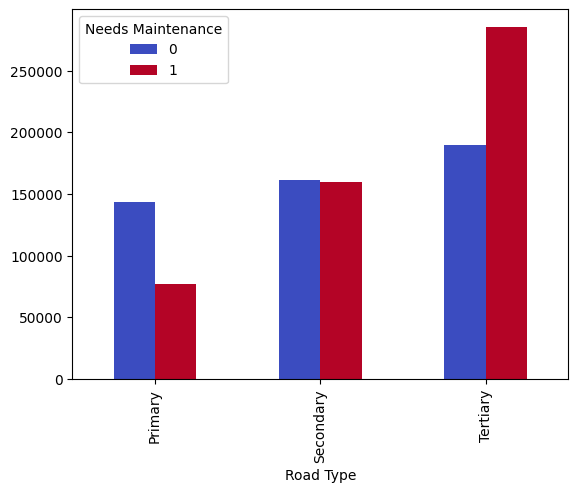

In [101]:
pivot1.plot(kind='bar',colormap='coolwarm')

**Answer Q1) According to Bar chart Road type matters for the maintenance as in the chart count of Raod which needs maintenance increases with moving from primary to secondary to tertiary.**

In [102]:
pivot2=pd.pivot_table(df,values='Average Rainfall',index='Road Type',columns='Needs Maintenance',aggfunc=['mean'])
pivot2

mean           
Needs Maintenance          0          1
Road Type                              
Primary            50.001691  80.011342
Secondary          49.984921  79.977610
Tertiary           49.980732  79.977802

<Axes: xlabel='Road Type'>

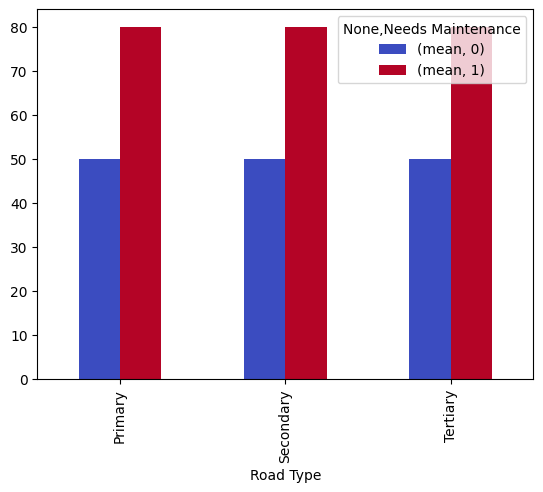

In [103]:
pivot2.plot(kind='bar',colormap='coolwarm')

**Q2) Does AADT (Average Annual Daily Traffic) affects roads for maintenance?, Does AADT affects diiferently on different type of roads?**

In [104]:
pivot3=pd.pivot_table(df,values='AADT',index='Road Type',columns='Needs Maintenance',aggfunc=['mean'])
pivot3

mean              
Needs Maintenance             0             1
Road Type                                    
Primary            26924.088386  38743.021640
Secondary           9670.632296  14341.976806
Tertiary            2017.617552   2837.887355

<Axes: xlabel='Road Type'>

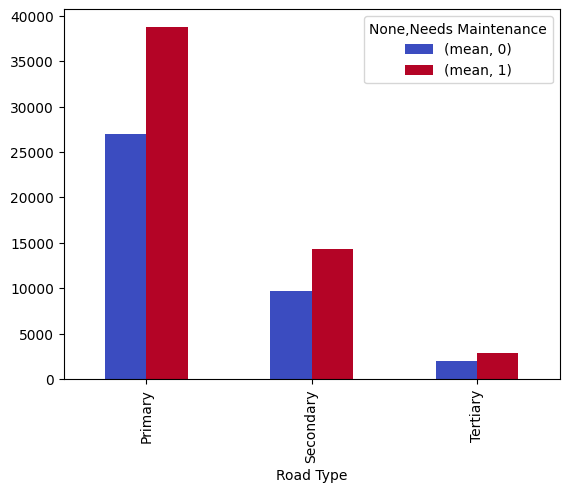

In [105]:
pivot3.plot(kind='bar',colormap='coolwarm')

**Answer Q2) According to bar chart as AADT value increases as roads maintenance chances increases and AADT value does work differently on different type of roads as in the Chart AADT value decrease from Primary to secondary to tertiary which explains that AADT values are high on primary road type and also bar of needed meintnac=nce is high in primary road type.**

In [106]:
df['Needs Maintenance'].groupby(df['Last Maintenance']).agg('mean')

Last Maintenance
1959    1.000000
1962    1.000000
1963    1.000000
1965    1.000000
1966    1.000000
1967    1.000000
1970    1.000000
1972    1.000000
1973    1.000000
1974    1.000000
1975    1.000000
1976    1.000000
1977    1.000000
1978    1.000000
1979    1.000000
1980    1.000000
1981    1.000000
1982    1.000000
1983    1.000000
1984    1.000000
1985    1.000000
1986    1.000000
1987    1.000000
1988    1.000000
1989    1.000000
1990    1.000000
1991    1.000000
1992    1.000000
1993    1.000000
1994    1.000000
1995    1.000000
1996    1.000000
1997    1.000000
1998    1.000000
1999    1.000000
2000    1.000000
2001    1.000000
2002    1.000000
2003    1.000000
2004    1.000000
2005    1.000000
2006    1.000000
2007    1.000000
2008    1.000000
2009    1.000000
2010    0.999945
2011    0.999682
2012    0.997667
2013    0.983467
2014    0.935837
2015    0.825647
2016    0.679206
2017    0.559463
2018    0.516842
2019    0.586062
2020    0.579135
2021    0.174025
2022    0.0018

**Q3) Does roads or segments maintained recently has less need of maintainance?**

<Axes: xlabel='Last Maintenance', ylabel='Needs Maintenance'>

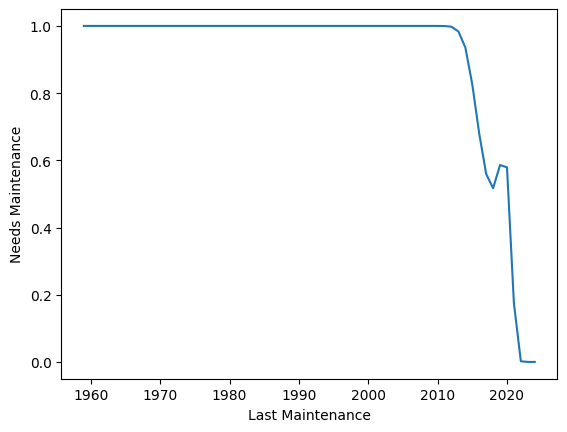

In [107]:
sns.lineplot(df['Needs Maintenance'].groupby(df['Last Maintenance']).agg('mean'))

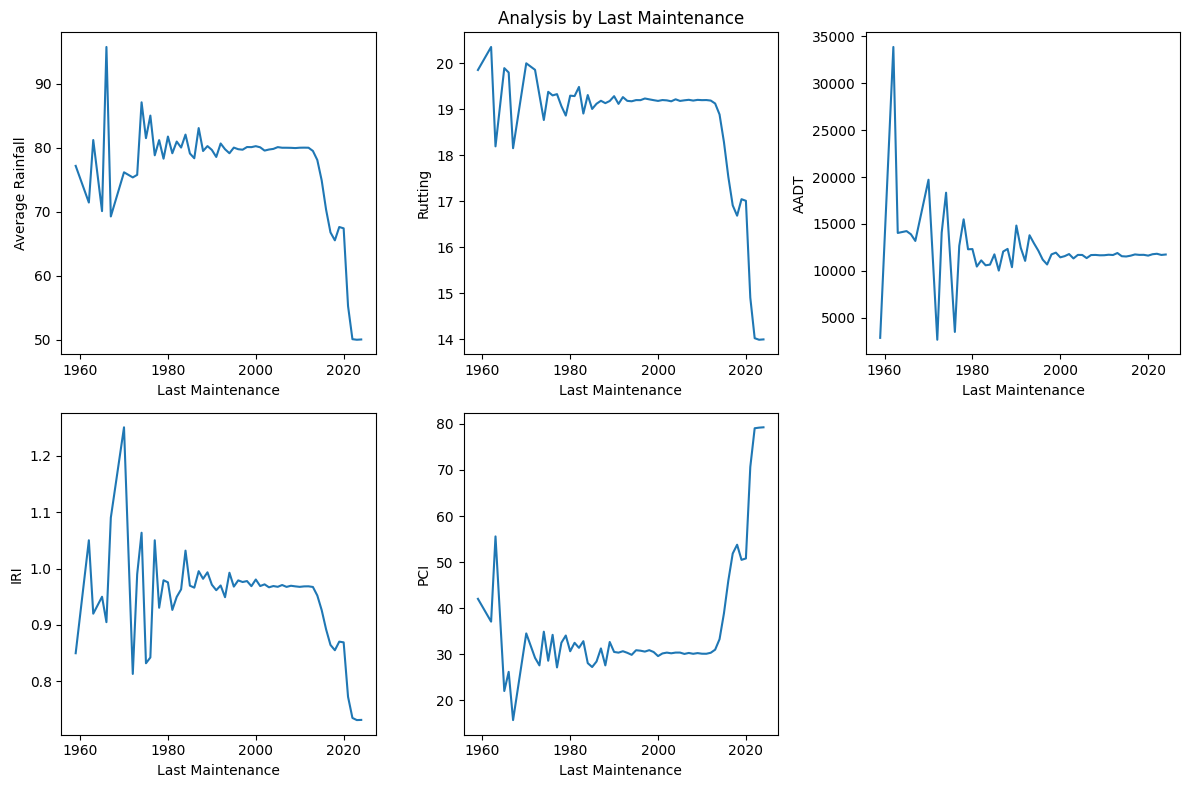

In [108]:
plt.figure(figsize=(12,8))
plt.title('Analysis by Last Maintenance')
plt.axis('off')
plt.subplot(2,3,1)
sns.lineplot(df['Average Rainfall'].groupby(df['Last Maintenance']).agg('mean'))
plt.subplot(2,3,2)
sns.lineplot(df['Rutting'].groupby(df['Last Maintenance']).agg('mean'))
plt.subplot(2,3,3)
sns.lineplot(df['AADT'].groupby(df['Last Maintenance']).agg('mean'))
plt.subplot(2,3,4)
sns.lineplot(df['IRI'].groupby(df['Last Maintenance']).agg('mean'))
plt.subplot(2,3,5)
sns.lineplot(df['PCI'].groupby(df['Last Maintenance']).agg('mean'))
plt.tight_layout()
plt.show()

**Answer Q3) the Roads which were maintaied early has less chances of maintainance needs and has high PCI (Pavement Cindition Index) value and less IRI (International Roughness Index).**

<Axes: xlabel='Last Maintenance', ylabel='Average Rainfall'>

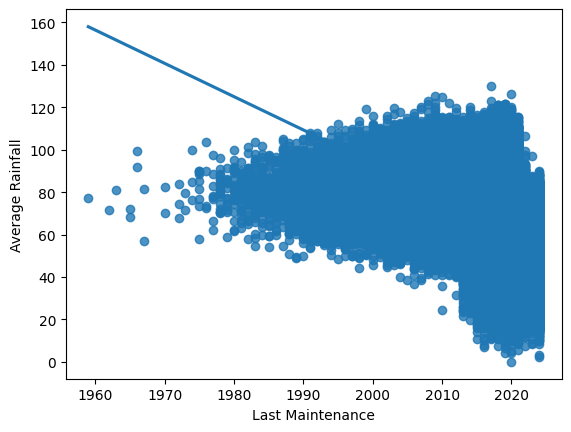

In [109]:
sns.regplot(x=df["Last Maintenance"],y=df["Average Rainfall"])

<Axes: xlabel='Average Rainfall', ylabel='IRI'>

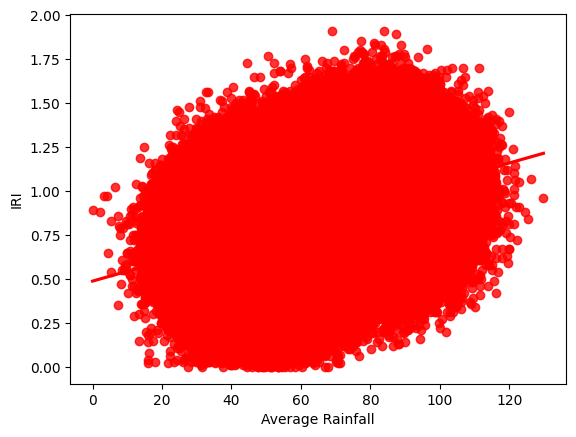

In [110]:
sns.regplot(x=df["Average Rainfall"],y=df["IRI"],color="r")

<Axes: xlabel='Rutting', ylabel='PCI'>

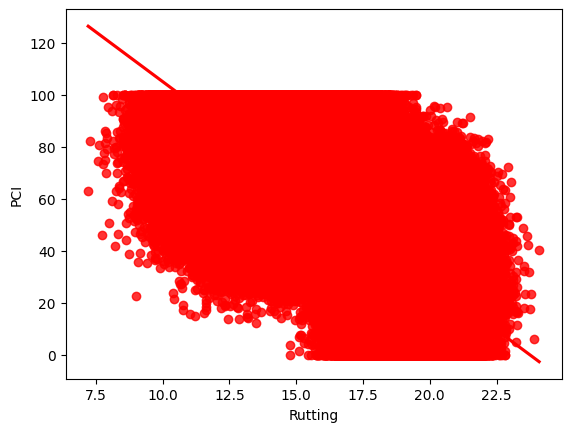

In [111]:
sns.regplot(x=df["Rutting"],y=df["PCI"],color='r')

In [112]:
maintenancebyasphalt=df['Needs Maintenance'].groupby(df['Asphalt Type']).agg('count')
maintenancebyasphalt

Asphalt Type
Asphalt     504086
Concrete    512707
Name: Needs Maintenance, dtype: int64

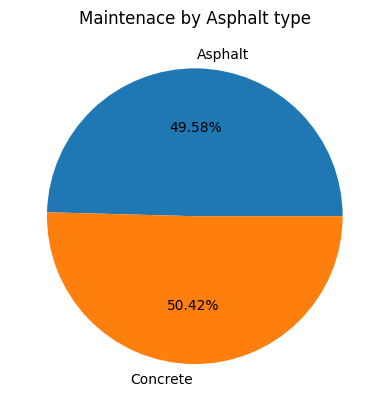

In [113]:
plt.pie(maintenancebyasphalt,labels=maintenancebyasphalt.index,autopct='%1.2f%%')
plt.title('Maintenace by Asphalt type')
plt.show()

**Q4) Which road has more quality between Asphalt and Concrete Road?**

In [114]:
pivot4=pd.pivot_table(df,values="Segment ID",index="Asphalt Type",columns="Needs Maintenance",aggfunc='count')
pivot4

Needs Maintenance,0,1
Asphalt Type,,
Asphalt,86940,417146
Concrete,407973,104734


<Axes: xlabel='Asphalt Type'>

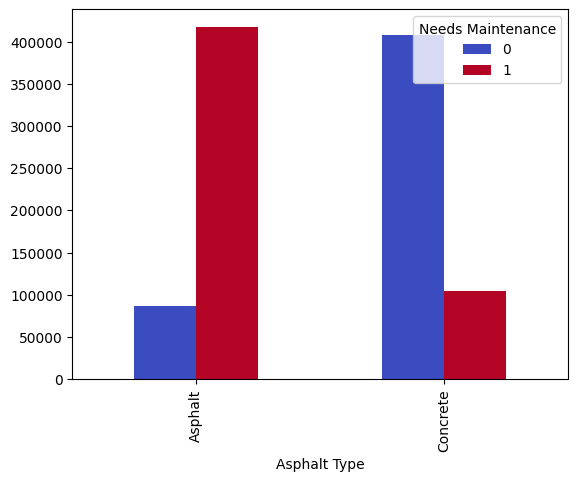

In [115]:
pivot4.plot(kind='bar',colormap='coolwarm')

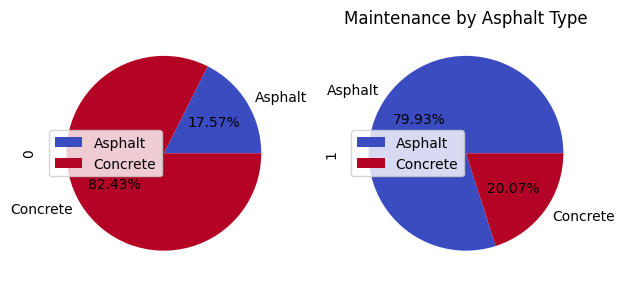

In [116]:
pivot4.plot(kind='pie',subplots=True,autopct='%1.2f%%',colormap='coolwarm')
plt.title('Maintenance by Asphalt Type')
plt.tight_layout()
plt.show()

**Q4 Answer) According to above charts Concrete road has more quality than Asphalt road as they have less number of Segments which needs maintenance.**

In [117]:
pivot5=pd.pivot_table(df,values='Average Rainfall',index='Asphalt Type',columns='Needs Maintenance',aggfunc='mean')
pivot5

Needs Maintenance,0,1
Asphalt Type,,
Asphalt,50.013840,80.000975
Concrete,49.982718,79.909778


**Q5) Does high rainfall increase the chance of maintenance needs on Asphalt and Concrete Roads?**

<Axes: xlabel='Asphalt Type'>

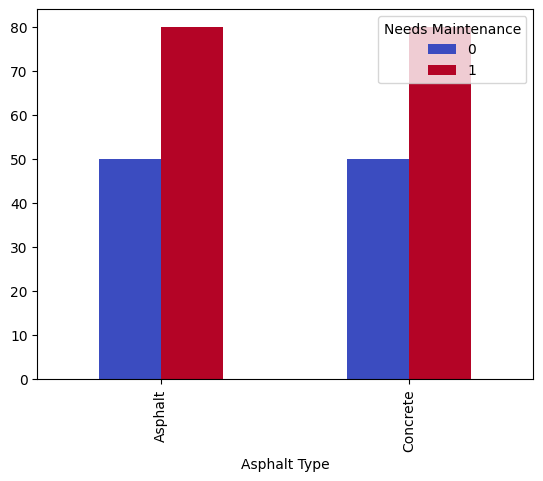

In [118]:
pivot5.plot(kind='bar',colormap='coolwarm')

**Answer Q5) According to Above chart high rainfall increases the number of roads which needs maintenance and its applies to both Asphalt and Concrete roads.**

**Q6) Does Rutting increases the number of maintenance?**

In [119]:
maintenacebyRutting=df["Rutting"].groupby(df['Needs Maintenance']).agg('mean')

<Axes: xlabel='Needs Maintenance'>

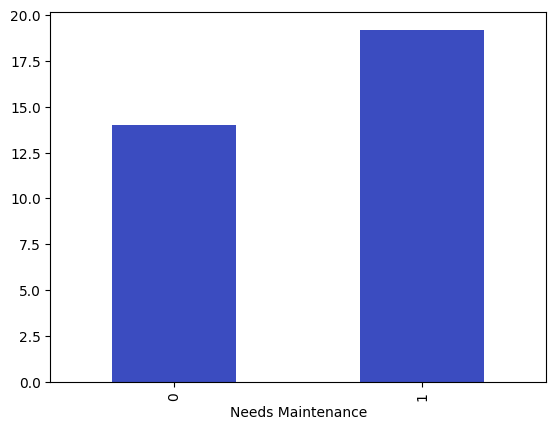

In [120]:
maintenacebyRutting.plot(kind='bar',colormap='coolwarm')

**Answer Q6) Yes more the value of rutting increases needs of road or segment maintenance increases.**

**Q7) Does rutting happens or increases on different Types of Roads and segment?**

In [121]:
pivot6=pd.pivot_table(df,values='Rutting',index=['Road Type','Asphalt Type'],columns='Needs Maintenance',aggfunc='mean')
pivot6

Needs Maintenance               0          1
Road Type Asphalt Type                      
Primary   Asphalt       14.552797  19.364828
          Concrete      14.557422  19.364724
Secondary Asphalt       13.919980  19.221709
          Concrete      13.930945  19.223538
Tertiary  Asphalt       13.636676  19.135709
          Concrete      13.634330  19.131181

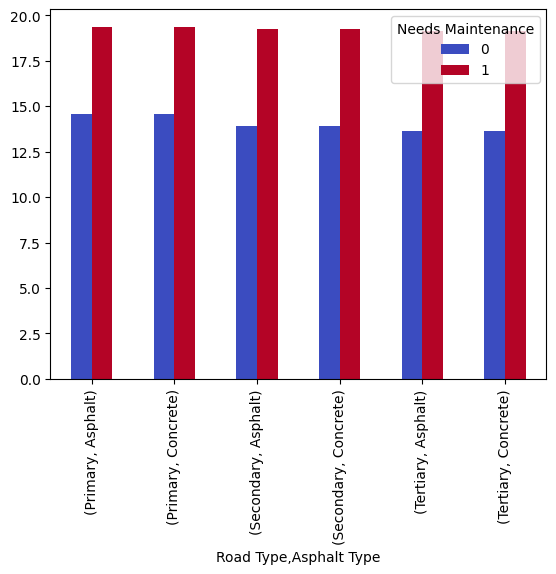

In [122]:
pivot6.plot(kind='bar',colormap='coolwarm')
plt.show()

**Answer Q7) No, According to above chart rutting occures approximately equal on on every road type.**

In [123]:
pivot7=pd.pivot_table(df,values='Segment ID',index='IRI level',columns='Needs Maintenance',aggfunc='count')
pivot7

Needs Maintenance,0,1
IRI level,,
good,8,463
very good,494905,521417


**Q8) How Rutting level affects Road Maintenace?**

In [124]:
pivot8=pd.pivot_table(df,values='Segment ID',index='Rutting level',columns='Needs Maintenance',aggfunc='count')
pivot8

Needs Maintenance,0,1
Rutting level,,
mid,1797.0,NaN
severe,493113.0,410362.0
very severe,3.0,111518.0


<Axes: xlabel='Rutting level'>

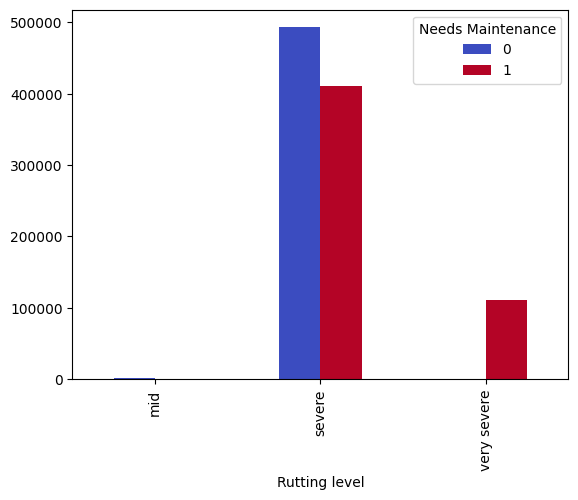

In [125]:
pivot8.plot(kind='bar',colormap='coolwarm')

**Answer Q8) If Rutting level is very severe than it needs Maintenance if Rutting level is at severe then need of mantenance has no need of maintenance has little difference.**

**Q9) How last maintenance affects maintenace needs of Road?**

In [126]:
pivot9=pd.pivot_table(df,values='Segment ID',index='Maintenance prevention',columns='Needs Maintenance',aggfunc='count')
pivot9

Needs Maintenance,0,1
Maintenance prevention,,
Preventive Maintenance,247059,506559
Routine Maintenance,247854,15321


<Axes: xlabel='Maintenance prevention'>

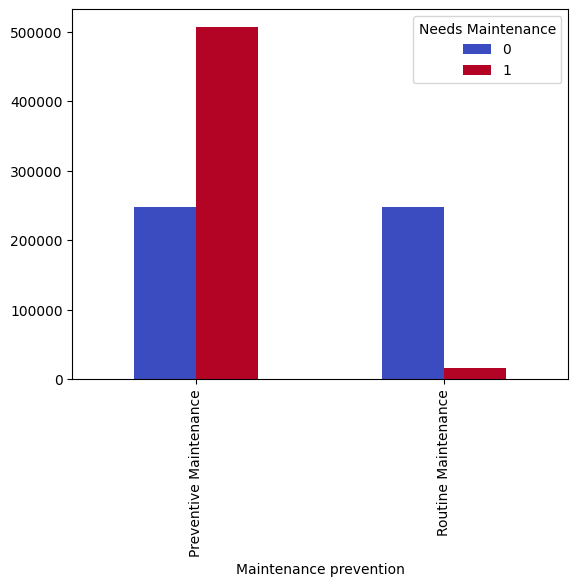

In [127]:
pivot9.plot(kind='bar',colormap='coolwarm')

**Answer Q9) If Road or segment is maintained before 2021 than road maintainance need chances are very high.**

**Q10) How PCI(pavement Condition Index) affects maintenace needs of Road?**

In [128]:
pivot10=pd.pivot_table(df,values='Segment ID',index='PCI level',columns='Needs Maintenance',aggfunc='count')
pivot10

Needs Maintenance,0,1
PCI level,,
excellent,198675,196
failed,1,55230
fair,23323,115308
good,95298,31061
poor,2530,186568
very good,174959,3658
very poor,127,129859


<Axes: xlabel='PCI level'>

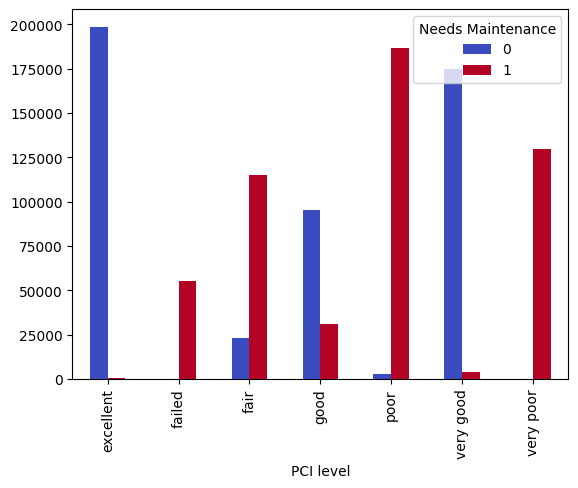

In [129]:
pivot10.plot(kind='bar',colormap='coolwarm')

**Answer 10) According to above chart if PCI level is very poor then road need maintenance and if PCI level is excellent it doesnot need maintenace, overall if PCI level decreases it increases the need of maintenance.**

**Q11) How Average Rainfall level effects the Road maintenance?**

In [130]:
pivot11=pd.pivot_table(df,values='Segment ID',index='AR level',columns='Needs Maintenance',aggfunc='count')
pivot11

Needs Maintenance,0,1
AR level,,
high,501,240144
low,78503,16
medium,415909,281720


<Axes: xlabel='AR level'>

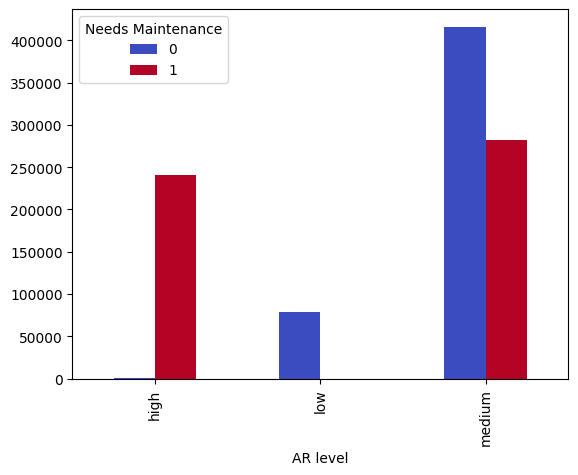

In [131]:
pivot11.plot(kind='bar',colormap='coolwarm')

**Answer Q11) According to above chart if Average rainfall level is low than road doesnt need maintenance and if average rainfall is high than road needs to be maintained, As Average Rainfall increases it increases te chances of need for road maintenance.**

**Q12) Does average rainfall increases Rutting on Road?**

In [132]:
pivot12=pd.pivot_table(df,values='Segment ID',index='AR level',columns='Rutting level',aggfunc='count')
pivot12

Rutting level,mid,severe,very severe
AR level,,,
high,NaN,184347.0,56298.0
low,953.0,77565.0,1.0
medium,844.0,641563.0,55222.0


<Axes: xlabel='AR level'>

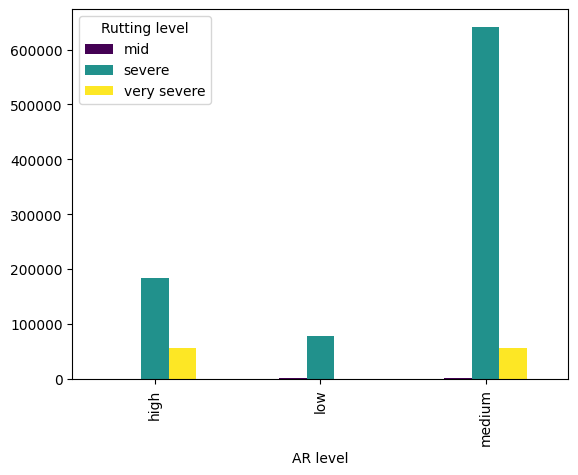

In [133]:
pivot12.plot(kind='bar',colormap='viridis')

**Answer Q12) Yes, As Average Rainfall level increases the rutting level also increases .**

<Axes: xlabel='AR level'>

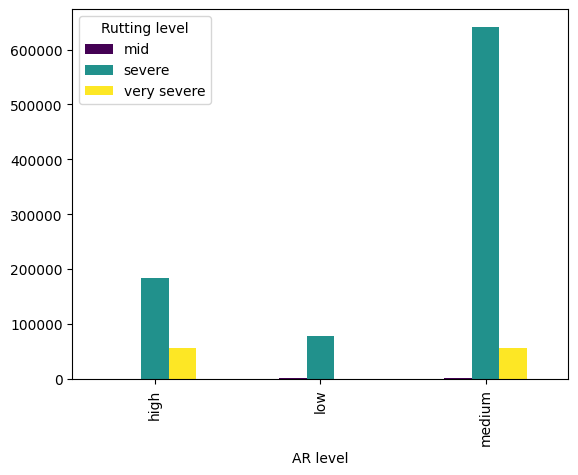

In [134]:
pivot12.plot(kind='bar',colormap='viridis')

<Axes: xlabel='Road Type'>

<Figure size 2000x2000 with 0 Axes>

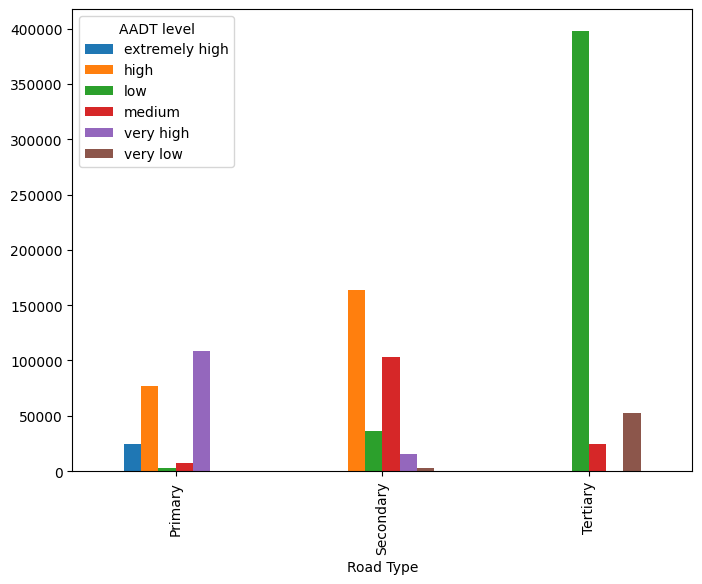

In [135]:
plt.figure(figsize=(20,20))
pivot13=pd.pivot_table(df,values='Segment ID',index='Road Type',columns='AADT level',aggfunc='count')
pivot13.plot(kind='bar',figsize=(8,6))

**Answer Q13) Different roads has different level of traffic as in above chart at tertiary road there is low level traffic and at primary level road the traffic level are very high.**

In [136]:
pivot13=pd.pivot_table(df,values='Segment ID',index='IRI level',columns='PCI level',aggfunc='count')
pivot13

PCI level,excellent,failed,fair,good,poor,very good,very poor
IRI level,,,,,,,
good,4,48,117,20,153,7,122
very good,198867,55183,138514,126339,188945,178610,129864


<Axes: xlabel='IRI level'>

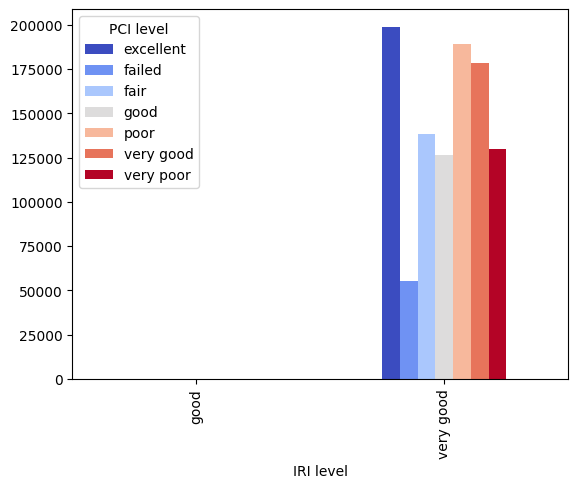

In [137]:
pivot13.plot(kind='bar',colormap='coolwarm')

**Q14) Does Pavement condition increases with low traffic or high traffic?**

In [138]:
pivot14=pd.pivot_table(df,values='Segment ID',index='AADT level',columns='PCI level',aggfunc='count')
pivot14

PCI level,excellent,failed,fair,good,poor,very good,very poor
AADT level,,,,,,,
extremely high,2157,2034,4501,2248,6904,2169,4765
high,48626,12529,32029,30550,42827,43993,29819
low,72054,27281,65168,50104,93135,64908,63774
medium,31662,6058,16188,18131,20958,28041,14333
very high,29680,5245,14578,17207,18219,26537,12444
very low,14692,2084,6167,8119,7055,12969,4851


<Axes: xlabel='AADT level'>

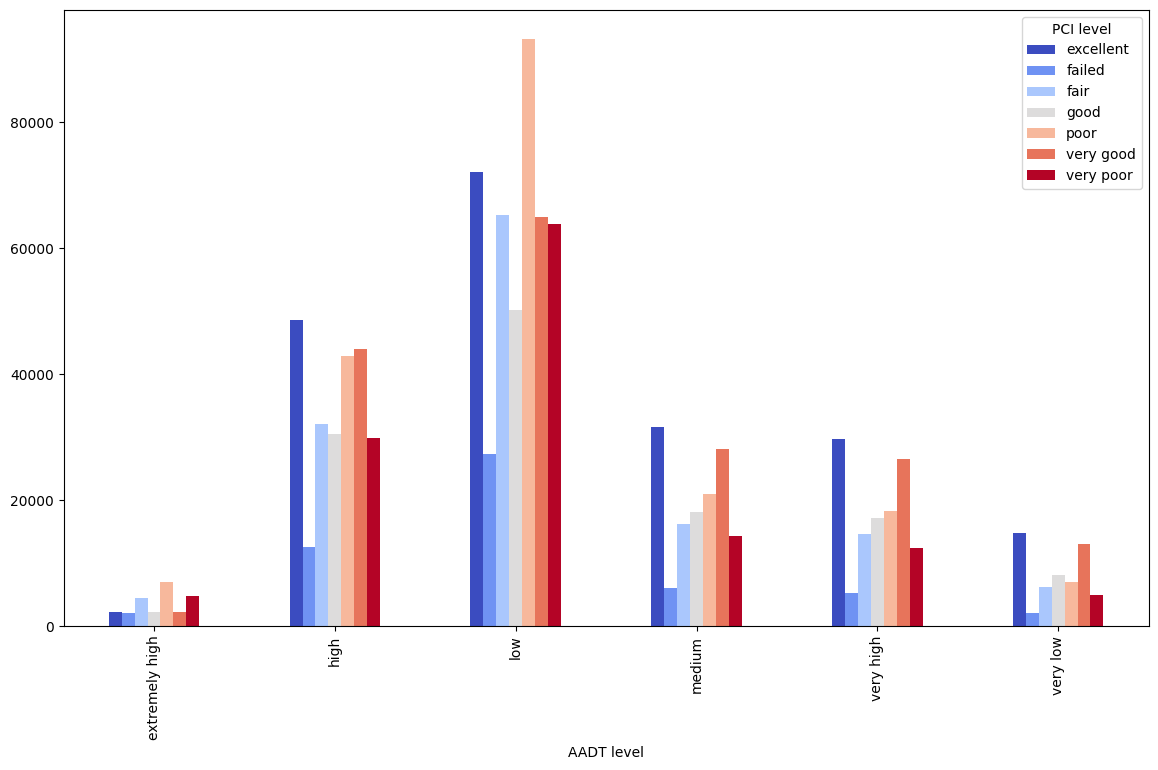

In [139]:
pivot14.plot(kind='bar',colormap='coolwarm',figsize=(14,8))

**Answer Q14) According to above chart lower the traffic better the condition of Pavement will be.**

**Q 15) Calculate relationship betwwen valriables(features).**

<Axes: >

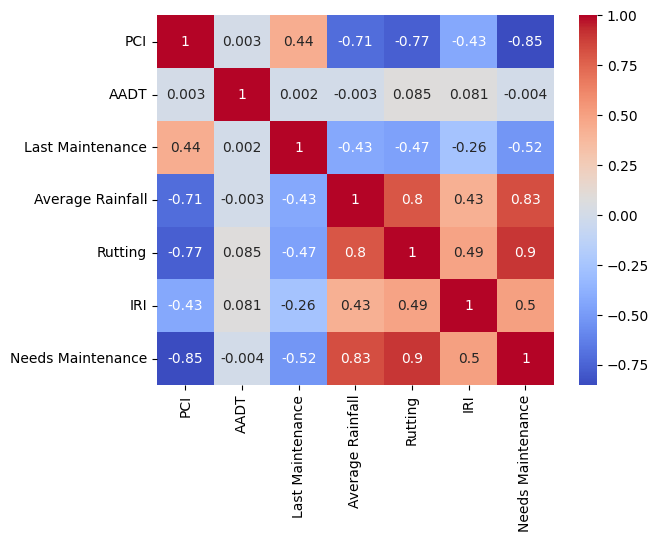

In [140]:
sns.heatmap(round(df[df.describe().columns].corr(),3),annot=True,cmap='coolwarm')

In [141]:
df.to_csv("Data/Cleaned.csv")